In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
wr = pd.read_csv('../input/wr/dk_stats_loc.csv')

In [9]:
players_lst = wr_2018['Name'].unique()
for player in players_lst:
    df = wr_2018[wr_2018['Name']== player]
    df.reset_index(inplace=True)
    df.drop(df.index[:8], inplace=True)
    try:
        df_2018 = pd.concat([df_2018, df])
    except:
        df_2018 = pd.DataFrame()
        
        

C:\Users\bobal\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [5]:
wr.replace('null',0, inplace=True)

In [6]:
wr['salary'] = wr['salary'].apply(lambda x: int(x))
wr['h/a_1'] = wr['h/a_1'].astype('category')
wr['surface_0'] = wr['surface_0'].astype('category')
wr['def_rk'] = wr['def_rk'].astype('category')
wr['PlayerID'] = wr['PlayerID'].astype('category')

In [7]:
wr.dtypes

PlayerID      category
Name            object
Team            object
Week             int64
Opponent        object
tar              int64
rec              int64
rec%           float64
yds              int64
td               int64
yds/tar        float64
yds/rec        float64
ru_att           int64
ru_yds           int64
ru_yds/att     float64
ru_td            int64
salary           int64
h/a_1         category
surface_0     category
def_rk        category
year             int64
points         float64
dtype: object

In [8]:
wr.describe()

,Week,tar,rec,rec%,yds,td,yds/tar,yds/rec,ru_att,ru_yds,ru_yds/att,ru_td,salary,year,points
count,7887.000000,7887.000000,7887.000000,7887.000000,7887.000000,7887.000000,7887.000000,7887.000000,7887.000000,7887.000000,7887.000000,7887.000000,7887.000000,7887.000000,7887.000000
mean,8.663497,4.273742,2.558387,47.695486,33.019019,0.201851,6.150856,9.542183,0.117408,0.722328,0.539559,0.004184,3929.478889,2016.128439,7.385292
std,5.078273,3.814990,2.547367,35.085861,37.013249,0.462471,6.341183,8.888123,0.462557,4.117318,3.074510,0.066489,1712.089317,0.920012,8.262671
min,1.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,-7.000000,-7.000000,0.000000,-14.000000,-14.000000,0.000000,0.000000,2015.000000,-1.300000
25%,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3000.000000,2015.000000,0.000000
50%,9.000000,4.000000,2.000000,50.000000,21.000000,0.000000,5.400000,9.000000,0.000000,0.000000,0.000000,0.000000,3300.000000,2016.000000,4.700000
75%,13.000000,7.000000,4.000000,75.000000,52.000000,0.000000,9.000000,14.000000,0.000000,0.000000,0.000000,0.000000,4700.000000,2017.000000,11.500000
max,17.000000,23.000000,17.000000,100.000000,300.000000,3.000000,67.000000,83.000000,10.000000,95.000000,75.000000,2.000000,10000.000000,2018.000000,53.800000


In [38]:
wr.columns

Index(['PlayerID', 'Name', 'Team', 'Week', 'Opponent', 'tar', 'rec', 'rec%',
       'yds', 'td', 'yds/tar', 'yds/rec', 'ru_att', 'ru_yds', 'ru_yds/att',
       'ru_td', 'salary', 'h/a_1', 'surface_0', 'def_rk', 'year', 'points'],
      dtype='object')

## Golden Tate

In [31]:
tate_vs_GB = ((wr.groupby(['Name','h/a_1','Opponent']).mean()).loc['Golden Tate']).loc[1.0].loc['GB']

tate = (wr.groupby('Name').mean()).loc['Golden Tate']

tate_home = (wr.groupby(['Name','h/a_1']).mean()).loc['Golden Tate'].loc[1.0]

In [32]:
for idx in tate_home.index:
    print(idx)

PlayerID
Week
tar
rec
rec%
yds
td
yds/tar
yds/rec
ru_att
ru_yds
ru_yds/att
ru_td
surface_0
def_rk
year
points


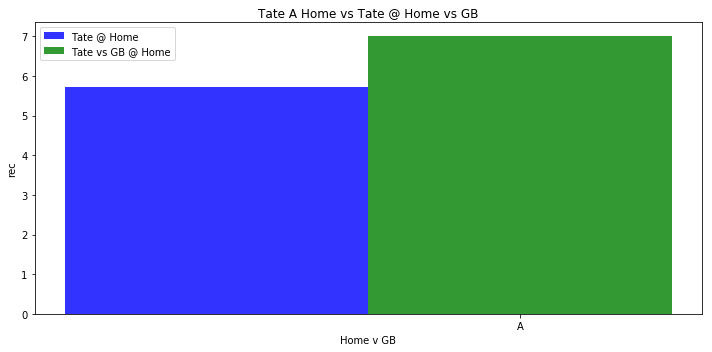

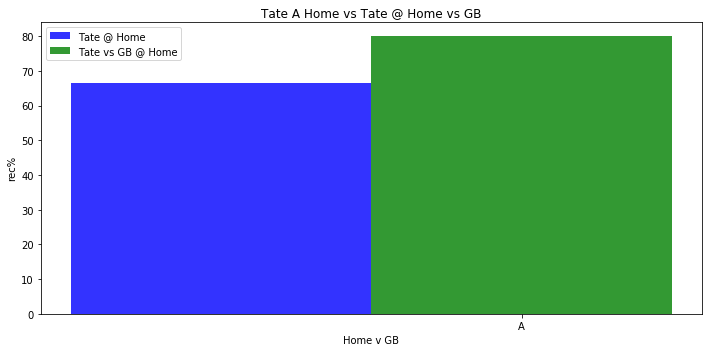

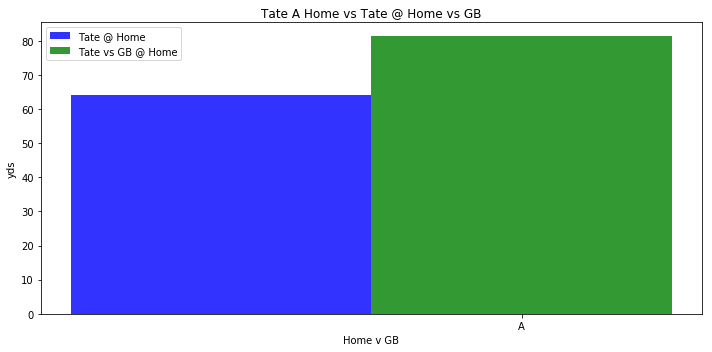

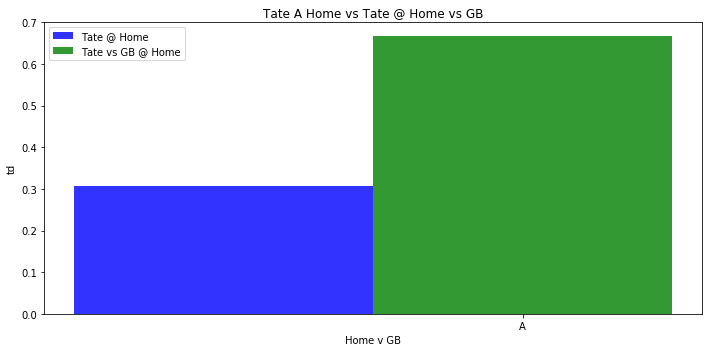

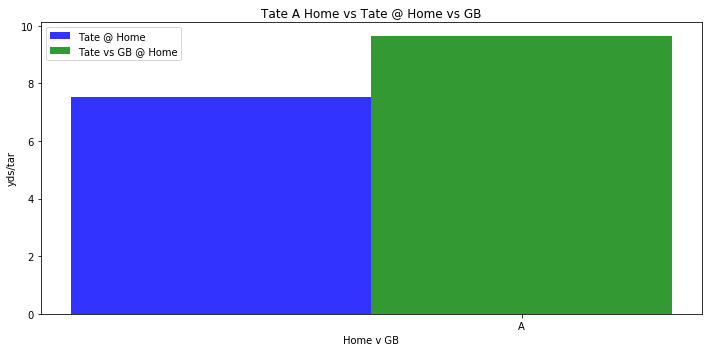

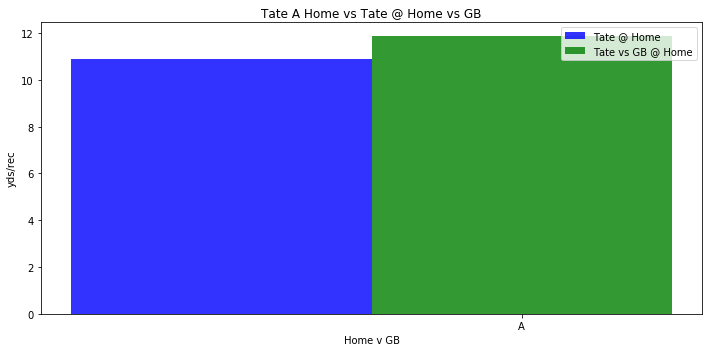

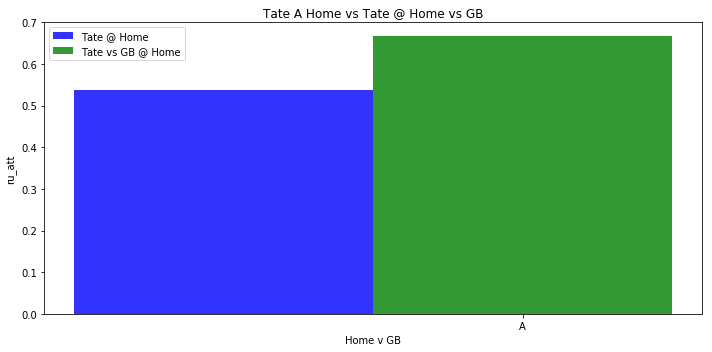

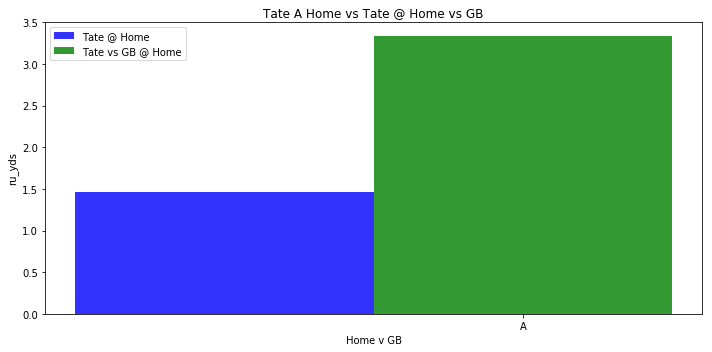

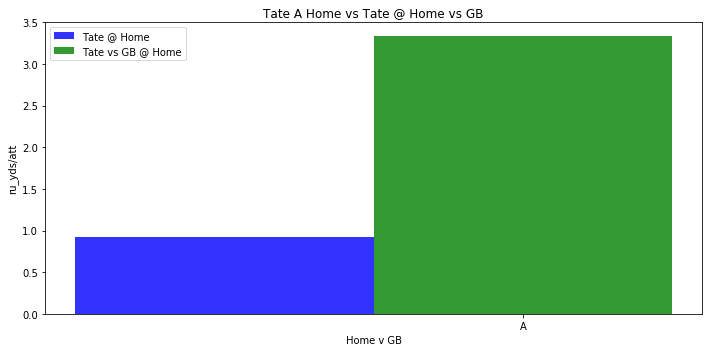

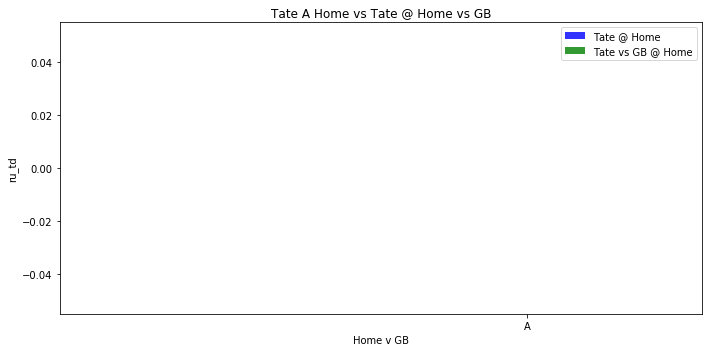

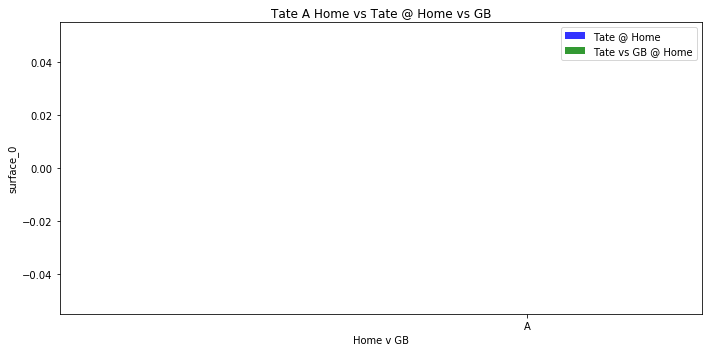

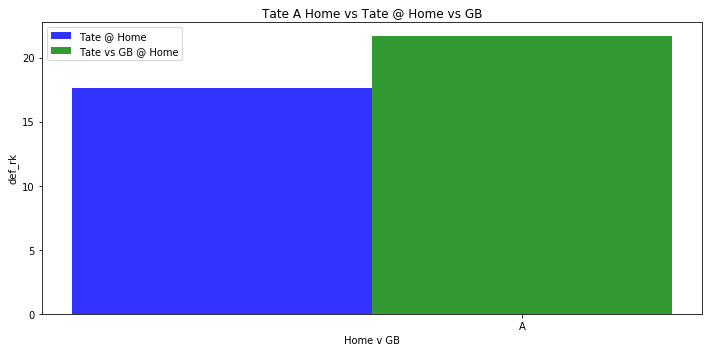

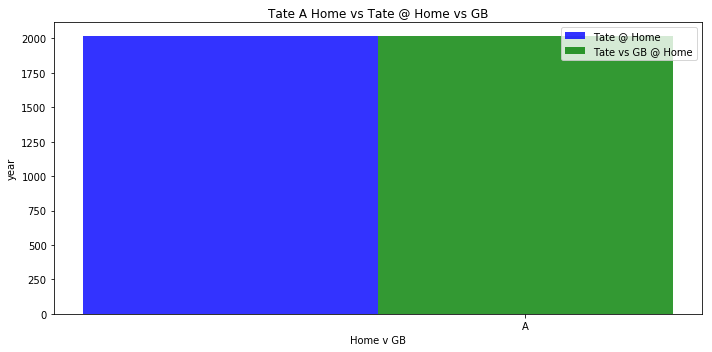

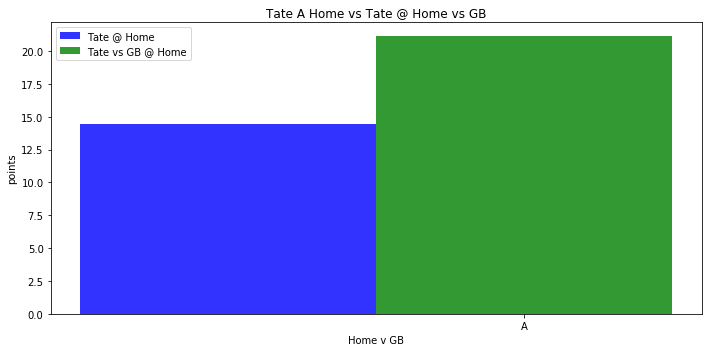

In [33]:
#plt.figure(figsize=(15,15))
for idx in tate_home.index[3:]:
    n_groups =1
    fig, ax = plt.subplots(figsize=(10,5))
    index = np.arange(n_groups)
    bar_width = 0.10
    opacity = 0.8

    rects1 = plt.bar(index, tate_home[idx], bar_width,
                     alpha=opacity,
                     color='b',
                     label='Tate @ Home')

    rects2 = plt.bar(index + bar_width, tate_vs_GB[idx], bar_width,
                     alpha=opacity,
                     color='g',
                     label='Tate vs GB @ Home')

    plt.xlabel('Home v GB')
    plt.ylabel(idx)
    plt.title('Tate A Home vs Tate @ Home vs GB')
    plt.xticks(index + bar_width, ('A', 'B'))
    plt.legend()

    plt.tight_layout()
    plt.show()


In [19]:
tate_home.index

CategoricalIndex([0.0, 1.0], categories=[0.0, 1.0], ordered=False, name='h/a_1', dtype='category')

In [39]:
def boxplotter(data, column_name):
    fig= plt.figure(figsize=(6,4))

    ax = sns.boxplot(data[column_name], orient='v',
                    fliersize=8, linewidth=1.5, notch=False,
                    saturation=0.5)
    ax.set_title(column_name, fontsize=20)
    plt.show()

In [65]:
rec_cols = [col for col in wr.columns if 'ru' not in col and wr[col].dtype.name != ('category')]
rushing_cols= [col for col in wr.columns if 'ru' in col]

In [233]:
rec_cols

['Name',
 'Team',
 'Week',
 'Opponent',
 'tar',
 'rec',
 'rec%',
 'yds',
 'td',
 'yds/tar',
 'yds/rec',
 'salary',
 'year',
 'points']

In [234]:
rushing_columns

['ru_att', 'ru_yds', 'ru_yds/att', 'ru_td']

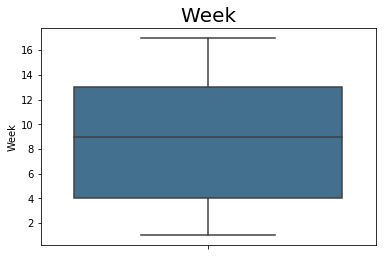

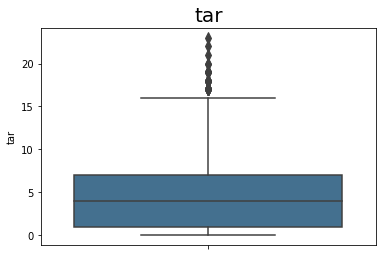

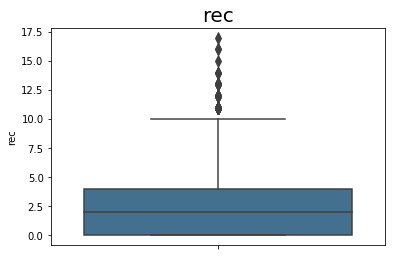

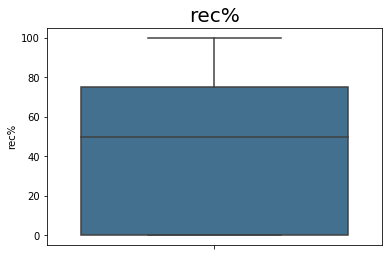

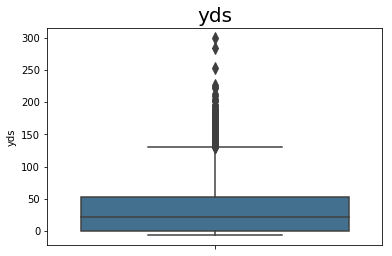

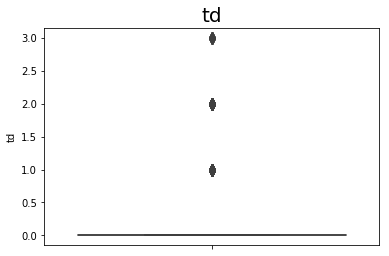

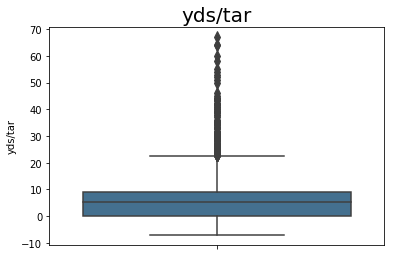

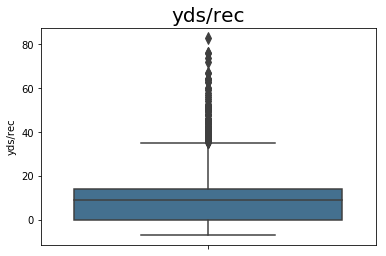

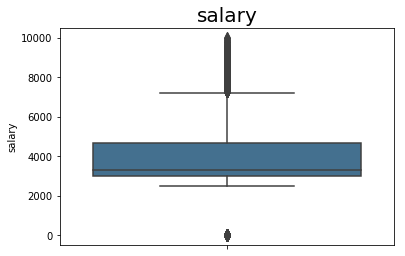

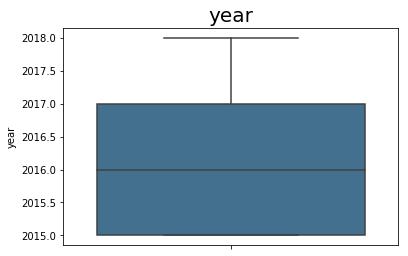

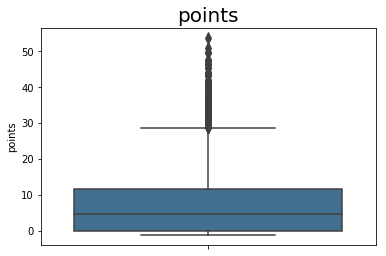

In [69]:
for col in rec_cols:
    if wr[col].dtype.name != 'object':
        boxplotter(wr,col)
    
        


In [237]:
def get_outliers(df):
    #rem_cols = ['Week','Year','Name','Opponent','Team']
    col_dict ={}
    for col in df.columns:
        if df[col].dtype.name == ('int64' or 'float64'):
            col_dict.update({col:df[col].describe()})

    col_name = []
    outliers_lst = []
    for col in df.columns:
        if df[col].dtype.name == ('int64' or 'float64'):
            col_name.append(col)
            outliers_lst.append(len(abs(df[col]-col_dict[col]['mean'])[df[col] > (col_dict[col]['std'])*3]))
            
    outliers= pd.DataFrame()
    outliers['col_name'] = col_name
    outliers['# of outliers'] = outliers_lst
    


    

    percent_lst = [ ]
    for idx, val in enumerate(outliers['# of outliers']):
        percent_lst.append(val/int(df.shape[0])*100)

    outliers['pecent'] = percent_lst
    outliers = outliers.drop(outliers.index[:2])



    return outliers

In [238]:
get_outliers(wr)

,col_name,# of outliers,pecent
2,rec,392,4.970204
3,yds,332,4.209459
4,td,178,2.256878
5,ru_att,137,1.737036
6,ru_yds,151,1.914543
7,ru_td,32,0.405731
8,salary,1620,20.540129
9,year,7887,100.000000


In [213]:
df_2015_lst=[]
for idx,year in enumerate(wr['year']):
    if year ==2015:
        df_2015_lst.append(idx)
    

In [216]:
df_2015_lst

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [217]:
df_2015 =wr[:len(df_2015_lst)]

In [227]:
df_2015_grp = df_2015.groupby('Week').median()

In [228]:
df_2015_grp['points']

Week
1     4.25
2     5.05
3     4.90
4     6.50
5     4.40
6     5.75
7     4.50
8     4.00
9     4.55
10    4.10
11    4.15
12    4.60
13    3.80
14    5.70
15    4.90
16    5.50
17    4.30
Name: points, dtype: float64

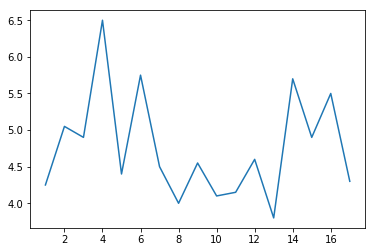

In [229]:
plt.plot(df_2015_grp.index,df_2015_grp['points'])

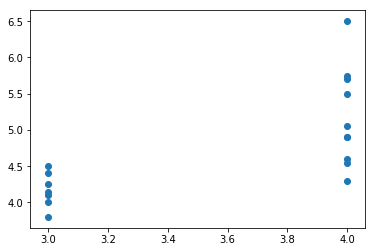

In [232]:
plt.scatter(df_2015_grp['tar'],df_2015_grp['points'])

In [199]:
for year in weekly_avg.index.levels[0]:
    print()

array([ True, False, False, False])

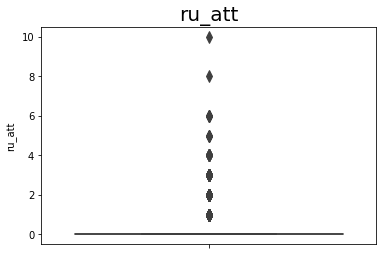

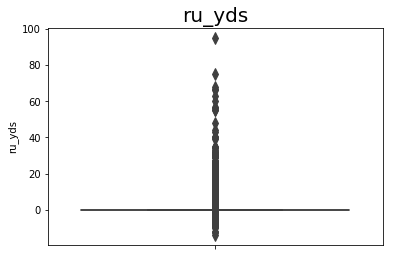

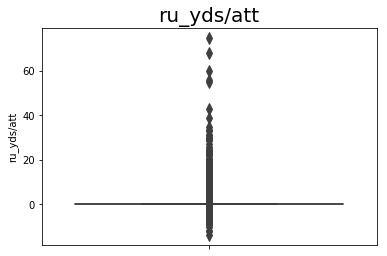

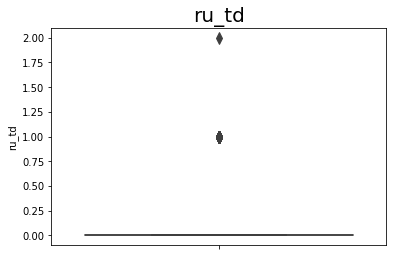

In [70]:
for col in rushing_cols:
    boxplotter(wr,col)

In [101]:
wr['rec'].describe().values.tolist()

[7887.0, 2.5583872194750854, 2.5473667159584963, 0.0, 0.0, 2.0, 4.0, 17.0]

In [11]:
wr['ReceivingYards'].describe()

count    14930.000000
mean        32.515472
std         37.628877
min         -7.000000
25%          0.000000
50%         20.000000
75%         52.000000
max        329.000000
Name: ReceivingYards, dtype: float64

In [24]:
temp = wr.drop('year', axis=1)

Text(0.5,1,'WR Stats')

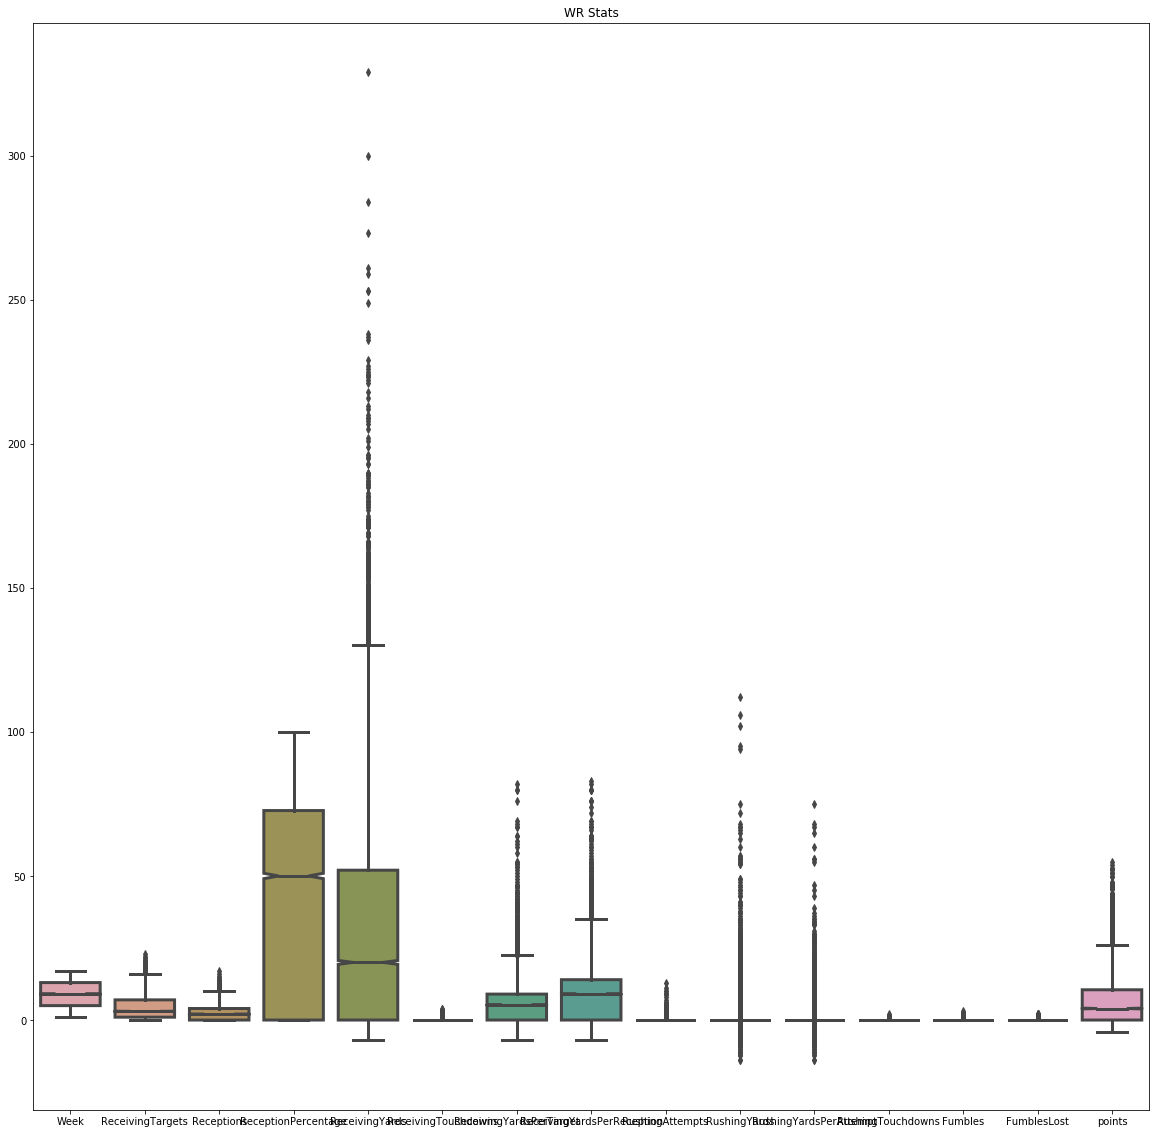

In [26]:
fig = plt.figure(figsize=(20,20))

ax = sns.boxplot(data=temp, orient='v', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5)

ax.set_title('WR Stats')

In [71]:
wr.corr()

,Week,tar,rec,rec%,yds,td,yds/tar,yds/rec,ru_att,ru_yds,ru_yds/att,ru_td,salary,year,points
Week,1.000000,-0.028737,-0.039985,-0.022021,-0.030696,-0.022315,-0.015031,-0.001732,-0.002235,0.013567,0.010778,0.011306,-0.064170,-0.164372,-0.033998
tar,-0.028737,1.000000,0.906781,0.388477,0.800446,0.369298,0.278179,0.398666,0.060327,0.022915,0.017279,0.013481,0.029915,-0.006984,0.803635
rec,-0.039985,0.906781,1.000000,0.582527,0.867513,0.412691,0.403299,0.380124,0.073927,0.032691,0.028868,0.016900,0.030081,-0.000197,0.883689
rec%,-0.022021,0.388477,0.582527,1.000000,0.500739,0.259868,0.691676,0.513042,0.059806,0.035919,0.030895,0.025719,0.016250,0.019354,0.510363
yds,-0.030696,0.800446,0.867513,0.500739,1.000000,0.472459,0.615018,0.631939,0.044502,0.013688,0.018659,0.004399,0.019834,-0.008365,0.935687
td,-0.022315,0.369298,0.412691,0.259868,0.472459,1.000000,0.317212,0.311264,0.029690,0.010925,0.018062,-0.002726,0.027365,-0.004314,0.704775
yds/tar,-0.015031,0.278179,0.403299,0.691676,0.615018,0.317212,1.000000,0.867647,0.022153,0.009211,0.016075,-0.000745,0.007611,0.009527,0.534171
yds/rec,-0.001732,0.398666,0.380124,0.513042,0.631939,0.311264,0.867647,1.000000,0.014396,-0.004087,0.004367,-0.009547,0.013203,0.000921,0.528943
ru_att,-0.002235,0.060327,0.073927,0.059806,0.044502,0.029690,0.022153,0.014396,1.000000,0.688810,0.463423,0.235538,0.001730,0.029817,0.102828
ru_yds,0.013567,0.022915,0.032691,0.035919,0.013688,0.010925,0.009211,-0.004087,0.688810,1.000000,0.875559,0.418821,-0.003555,0.006303,0.091771


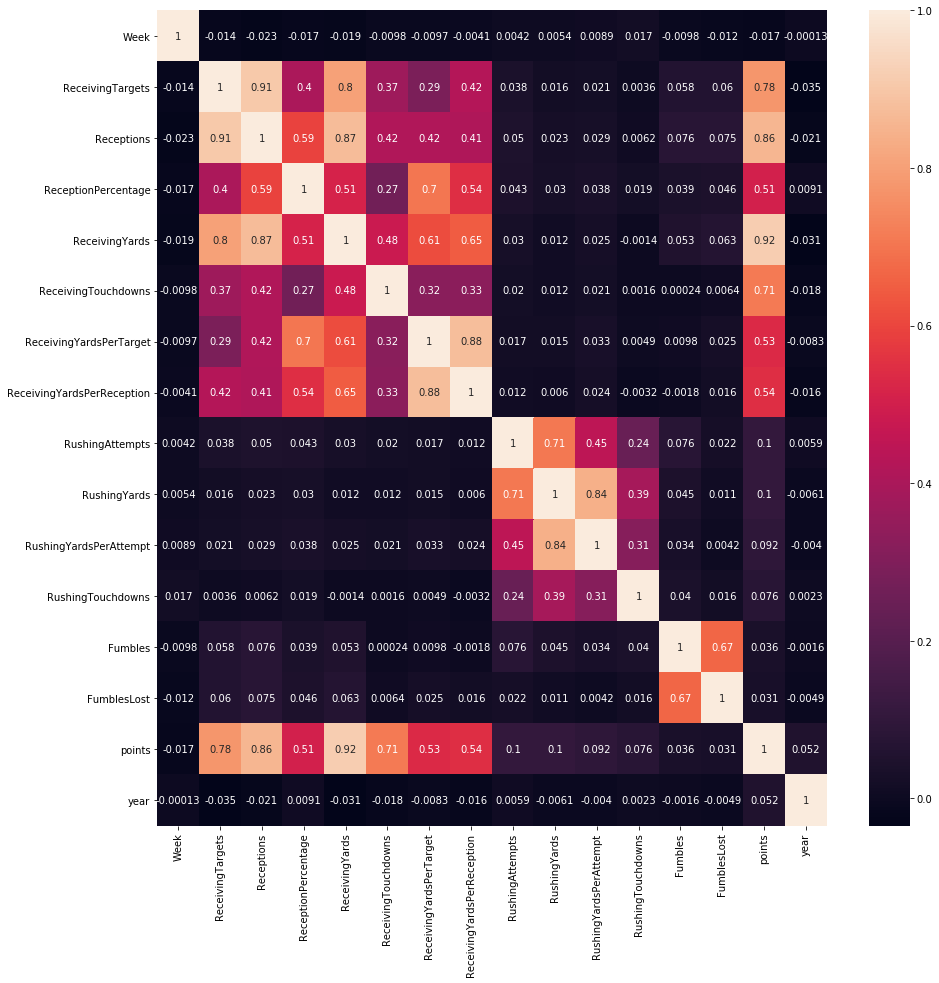

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(wr.corr(), annot=True)

In [66]:
corr = pd.DataFrame(index=wr.columns[4:12])

In [58]:
wr.columns[4:11]

Index(['ReceivingTargets', 'Receptions', 'ReceptionPercentage',
       'ReceivingYards', 'ReceivingTouchdowns', 'ReceivingYardsPerTarget',
       'ReceivingYardsPerReception'],
      dtype='object')

In [225]:
np.corrcoef(wr.points,wr[col])

array([[1., 1.],
       [1., 1.]])

In [43]:
wr.columns

Index(['Name', 'Team', 'Week', 'Opponent', 'ReceivingTargets', 'Receptions',
       'ReceptionPercentage', 'ReceivingYards', 'ReceivingTouchdowns',
       'ReceivingLong', 'ReceivingYardsPerTarget',
       'ReceivingYardsPerReception', 'RushingAttempts', 'RushingYards',
       'RushingYardsPerAttempt', 'RushingTouchdowns', 'Fumbles', 'FumblesLost',
       'points', 'year'],
      dtype='object')

In [67]:
coef =[]
for col in wr.columns[4:12]:
    #print(qb[col])
    coef.append(np.corrcoef(wr.points,wr[col])[0][1])

In [68]:
corr[1] = coef

In [69]:
corr

,1
ReceivingTargets,0.777497
Receptions,0.856903
ReceptionPercentage,0.506708
ReceivingYards,0.915692
ReceivingTouchdowns,0.710141
ReceivingYardsPerTarget,0.532937
ReceivingYardsPerReception,0.544621
RushingAttempts,0.104118


In [239]:
wr.columns

Index(['PlayerID', 'Name', 'Team', 'Week', 'Opponent', 'tar', 'rec', 'rec%',
       'yds', 'td', 'yds/tar', 'yds/rec', 'ru_att', 'ru_yds', 'ru_yds/att',
       'ru_td', 'salary', 'h/a_1', 'surface_0', 'def_rk', 'year', 'points'],
      dtype='object')

In [242]:
drop_lst = ['rec%']
for col in wr.columns:
    if 'ru' in col:
        drop_lst.append(col)
wr_eda = wr.drop(drop_lst, axis=1)

In [243]:
wr_eda.head()

,PlayerID,Name,Team,Week,Opponent,tar,rec,yds,td,yds/tar,yds/rec,salary,h/a_1,surface_0,def_rk,year,points
0,204,Roddy White,ATL,1,PHI,8,4,84,0,10.5,21.0,6500,1.0,0.0,30,2015,12.4
2,2429,Andre Johnson,IND,1,BUF,10,4,24,0,2.4,6.0,6100,0.0,0.0,18,2015,6.4
3,2950,Steve Johnson,LAC,1,DET,6,6,82,1,13.7,13.7,3700,0.0,0.0,20,2015,20.2
4,3330,Miles Austin,PHI,1,ATL,3,2,22,0,7.3,11.0,3000,0.0,0.0,12,2015,4.2
5,3519,Vincent Jackson,TB,1,TEN,11,4,51,0,4.6,12.8,6000,1.0,1.0,19,2015,9.1


In [245]:
wr_eda.drop('PlayerID', axis=1, inplace=True)

In [246]:
wr_eda.to_csv('../input/wr/wr_loc_cleaned.csv', index=False)

In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [74]:
#A function that will covert a time series database into a supervised learning database

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [75]:
train  = wr[wr['year']!=2017]
test = wr[wr['year']==2017]

In [76]:
wr.columns

Index(['Name', 'Team', 'Week', 'Opponent', 'ReceivingTargets', 'Receptions',
       'ReceptionPercentage', 'ReceivingYards', 'ReceivingTouchdowns',
       'ReceivingYardsPerTarget', 'ReceivingYardsPerReception',
       'RushingAttempts', 'RushingYards', 'RushingYardsPerAttempt',
       'RushingTouchdowns', 'Fumbles', 'FumblesLost', 'points', 'year'],
      dtype='object')

In [345]:
passing = ['Comp','Att','Pct','Yds','Yds/Att','TD','Int']

In [77]:
y_train = train['points']
y_test = test['points']
X_train = train.drop('points',axis=1)
X_test = test.drop('points', axis=1)

In [78]:
X_train = X_train[X_train.columns[4:12]]
X_test = X_test[X_test.columns[4:12]]

In [79]:
X_train.columns

Index(['ReceivingTargets', 'Receptions', 'ReceptionPercentage',
       'ReceivingYards', 'ReceivingTouchdowns', 'ReceivingYardsPerTarget',
       'ReceivingYardsPerReception', 'RushingAttempts'],
      dtype='object')

In [80]:
reframed = series_to_supervised(X_train.values.astype('float32'),1,1)

In [81]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
coeff = pd.DataFrame(X_train.columns)
coeff['coefficients'] = lr.coef_
coeff



,0,coefficients
0,ReceivingTargets,-0.033409
1,Receptions,0.706242
2,ReceptionPercentage,-0.000008
3,ReceivingYards,0.122504
4,ReceivingTouchdowns,6.107750
5,ReceivingYardsPerTarget,0.000926
6,ReceivingYardsPerReception,-0.029327
7,RushingAttempts,1.286981


In [83]:
yhat = lr.predict(X_test)
yhat.shape

(2559,)

In [84]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(yhat, y_test)
print("RMSE error is: " + str(rmse_val))

RMSE error is: 1.06535345394


In [88]:
results = pd.DataFrame()
results['Name'] = wr[wr['year']==2017]['Name']
results['score'] = y_test
results['Predicted'] = yhat
results['Week'] = wr[wr['year']==2017]['Week']
#results.groupby('Player').mean()[['score','Predicted']]
results[results['Name']=='Antonio Brown']

,Name,score,Predicted,Week
12371,Antonio Brown,32.2,29.268547,1
12613,Antonio Brown,11.2,10.441199,2
12789,Antonio Brown,30.0,25.903104,3
12966,Antonio Brown,7.4,6.484378,4
13087,Antonio Brown,28.7,25.248690,5
13226,Antonio Brown,32.5,29.897560,6
13384,Antonio Brown,16.5,16.133065,7
13500,Antonio Brown,12.0,11.408977,8
13830,Antonio Brown,7.7,7.229051,10
13923,Antonio Brown,45.4,42.220359,11


In [89]:
results.shape

(2559, 4)